<center>
<font size='7' style="color:#0D47A1">  <b>DECISION TREES</b> </font>
</center>

<hr style= "height:3px;">
<br>

<font size='6' style="color:#00A6D6">  <b>Introduction. What are they?</b> </font>

Decision Trees are predictive models that choose distinguishing observations, or features, about a set of data to predict each data element's target value, also known as the data element's class. 

To further explain, each feature is represented in the internal nodes and branches of the tree. At each node, we see a split of the data set on that feature, either leading to another internal node with a another distinguishing observation or to a specific class, called a leaf.

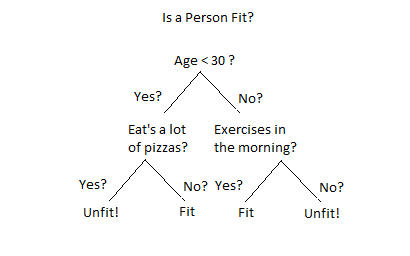

In [2]:
from IPython.display import Image
import numpy as np
Image(filename='./Decision-Trees.png')

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Types of Decision Trees</b> </font>

- **Classification Trees**
    - An analysis where the target data, or classes, are discretized
- **Regression Trees**
    - An analysis where the classes are continuous, i.e. they take on real numbers.
        - *This is not to say they have infinite domain*


<font size='5' style="color:#4CAF50">  <b>Ensembles</b></font>

Decision trees are commonly used in ensembles to better predict the classes within a set of data. There are many techniques to create these ensembles, some common ones are:

- Boosted Trees
    - incrementally building an ensemble of trees by applying boosted methods
- Bagged Trees
    - Building multiple trees by resampling the data each time and deciding on a class by a consensus prediction

In the following program you can change the depth value to visualize how the classifier splits the data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline 
X, y = make_blobs(centers=[[0, 0], [1, 1]], n_samples=50)

def plot_forest(max_depth=1):
    plt.figure()
    ax = plt.gca()
    h = 0.02

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    if max_depth != 0:
        forest = RandomForestClassifier(n_estimators=1, max_depth=max_depth,
                                        random_state=1).fit(X, y)
        Z = forest.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=.4)
        ax.set_title("max_depth = %d" % max_depth)
    else:
        ax.set_title("data set")
    ax.scatter(X[:, 0], X[:, 1], c=np.array(['b', 'r'])[y], s=60)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


def plot_forest_interactive():
    from ipywidgets import interactive, IntSlider
    slider = IntSlider(min=0, max=8, step=1, value=0)
    return interactive(plot_forest, max_depth=slider)
plot_forest_interactive()

In the above program there is a parameter called n_estimators. If you change the value of that number, the algorithm will consider several trees to make their decision, this are called random forest and you can find information about them here:https://en.wikipedia.org/wiki/Random_forest

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Strengths/Weaknesses of a Decision Tree</b> </font>

<font size='5' style="color:#4CAF50">  <b>Some Advantages</b></font>

 - Simple to understand
 - Can Handle both numerical and categorical data (We will see this soon)
 - Relatively little Data preparation needed
 - The mechanism for the model can be easily extracted and understood
 - Robust against co-linearity

<font size='5' style="color:#4CAF50">  <b>Some Disadvantages</b></font>

- Accuracy
- Not very robust in general
- Overfitting
- Locality of Optimization

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>How to Build a Decision Tree?</b> </font>

<font size='5' style="color:#4CAF50">  <b>ID3</b></font>

This method uses a maximization of Information gain or a minimization of entropy to determine how to split the tree at each node.

<font size='5' style="color:#4CAF50">  <b>Definitions</b></font>

**Entropy prior to splitting**

$$
Hprior(X) = \sum_{y \in Y} -p(y) log_2 p(y)
$$

where
- X is one subset of the data determined by a value of the feature
- Y is the set of classes
- p(y) is the proportion of the class y in the subset X

**Entropy of the feature**

$$
H(D) = \sum_{X \in D} p(X)Hprior(X)
$$

where
- D is the data set partitioned by the values of a feature

*In ID3, we choose to split data on  the smallest entropy.*

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>ID3 Pseudocode</b> </font>

In [ ]:
Image(filename='./pseudo.png')

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Summary</b> </font>

According to [1].

Classification Tree are used when you have Discrete output.

It's a Supervised Learning algorithm (ID3, C4.5).

When to use it:
    
    when we have a finite number of classification categories
    the data can be represented as vectors
    you want to understand how the classifier makes its choices

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Example</b> </font>

The following is an example from Brian Pardo's course at NU.

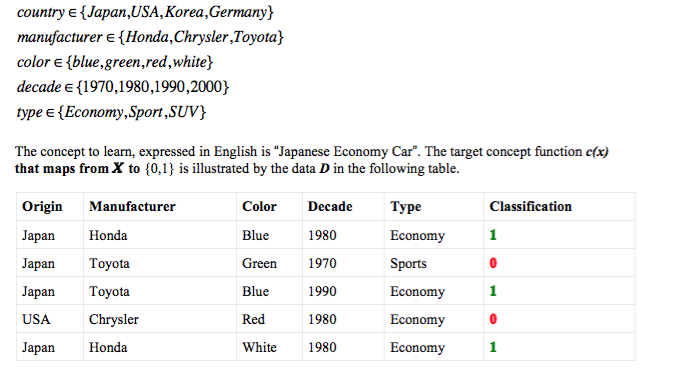

In [3]:
Image(filename='./problem.png')

Let's calculate the entropy obtained by splitting at Color:
$Color=Blue $

$-P(class=1|Color=Blue)log_2(P(class=1|Color=Blue))-P(class=0|Color=Blue)log_2(P(class=0|Color=Blue))$

In [82]:
1*np.log2(1)-0


0.0

In [84]:
#Color=Green
0-1*np.log2(1)
#Color=Red
0-1*np.log2(1)
#Color=White 
-1*np.log2(1)-0

-0.0

We compute $H(Color)=\sum p(S)H(S)=$


In [85]:

#Entropy
print(2/5*0+1/5*0+1/5*0+1/5*0)



0.0



We compute $H(Origin)=\sum p(S)H(S)=$

In [86]:
1/5*0+4/5*(-3/4*np.log2(3/4)-1/4*np.log2(1/4))

0.6490224995673063

Lets write a function:

In [87]:
Origin = np.asarray([0, 0, 0, 1, 0])
Manu = [0, 2, 2, 1, 0]
Color = [0, 1, 0, 2, 3]
Year = [1, 0, 2, 1, 1]
Type = [0, 1, 0, 0, 0]
target = np.asarray([1, 0, 1, 0, 1])

In [88]:
def partition(a):
    return {c: (a==c).nonzero()[0] for c in np.unique(a)}
#for splitting a set
# maps each unique value to its indicies in an array
# nonzero: return the indices of the elements that are non-zero.

print(partition(Origin))

{0: array([0, 1, 2, 4], dtype=int64), 1: array([3], dtype=int64)}


In [89]:
import numpy as np
def entropyPrior(s):
    res = 0
    val, counts = np.unique(s, return_counts=True)
    freqs = counts.astype('float')/len(s)
    for p in freqs:
        if p != 0.0 and p!= 1.0:
            res -= p * np.log2(p)
            
    return res


In [90]:
def entropy(feature, target):
    H=0
    subset = partition(feature)
    for x in partition(feature).keys():
        H += len(subset[x])/len(feature)*entropyPrior(target[feature==x])
    return H
        
for i, word in enumerate([Origin, Manu, Color, Year, Type]):
    print('feature ',i,' has entropy: ', entropy(word,target))

feature  0  has entropy:  0.6490224995673063
feature  1  has entropy:  0.4
feature  2  has entropy:  0.0
feature  3  has entropy:  0.5509775004326937
feature  4  has entropy:  0.6490224995673063


We choose Color as the root of the Tree. All Blue and White cars will have a classification of 1. 

Our Tree describes the concept "Japanese Economic Car" as a car that is either white or blue. 

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Homework</b> </font>

The following code imports the Wine data set.


In [1]:
import altair as alt
alt.renderers.enable('notebook')
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
data = load_wine()

Data Set Characteristics.

Number of Instances: 178 (50 in each of three classes)

Number of Attributes: 13 numeric, predictive attributes and the class


 	
  

In [2]:
print('Attribute Information:')
data['feature_names']

Attribute Information:


['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [3]:
print('classes:')
np.unique(data['target'])

classes:


array([0, 1, 2])

Use the notebook "First Machine Learning Notebook" and repeat the analysis with the Wine dataset. Note that now we have more attibutes. 

In [4]:
#We move it to panda 
index = [i for i in range(len(data['data']))]
#wine_Data has the data and classes has the labels
wine_Data = pd.DataFrame(data = np.float_(data['data']), index = index, columns = data['feature_names'])
classes=np.array(np.int_(data['target']))

In [5]:
wine_Data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Let's add the class as a feature to do visualization:

In [6]:
import copy
wineWithLabel = wine_Data.copy(deep=True)
wineWithLabel['class']=classes

C:\Users\FSU\Anaconda2\envs\ML\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\FSU\Anaconda2\envs\ML\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


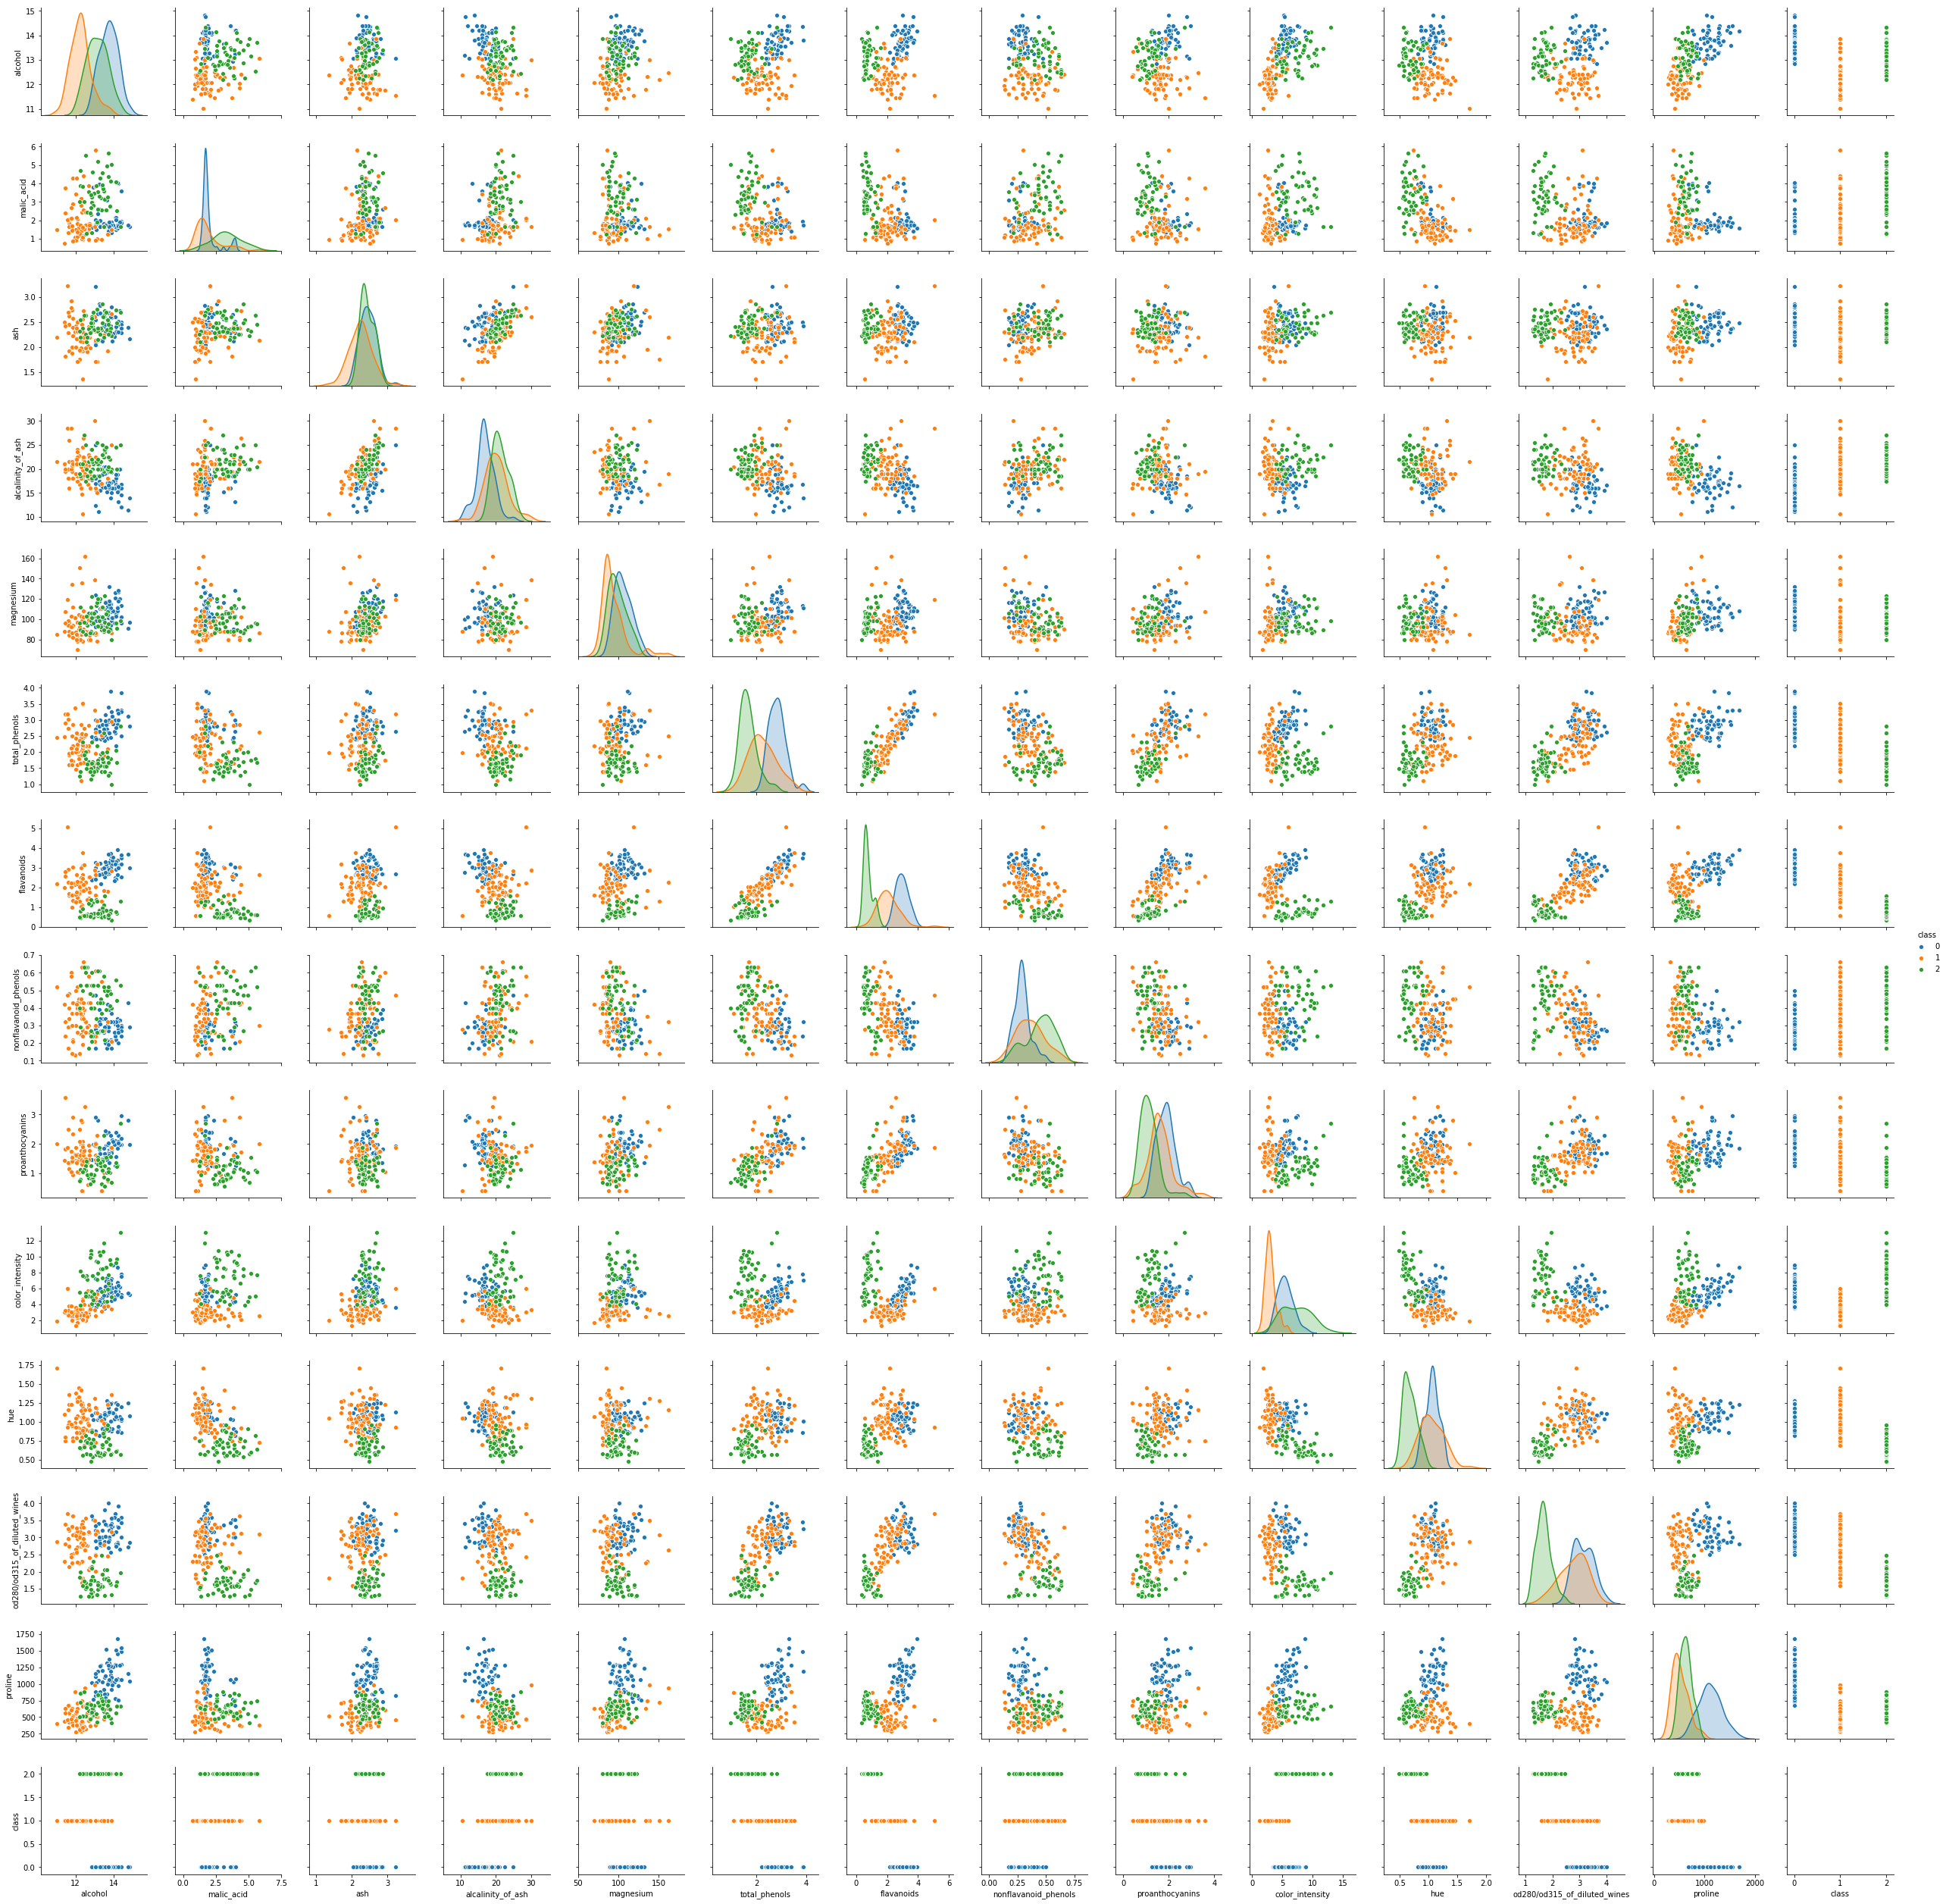

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.pairplot(wineWithLabel,hue='class')

Here is an interactive visualization of the data. (select regions on it)

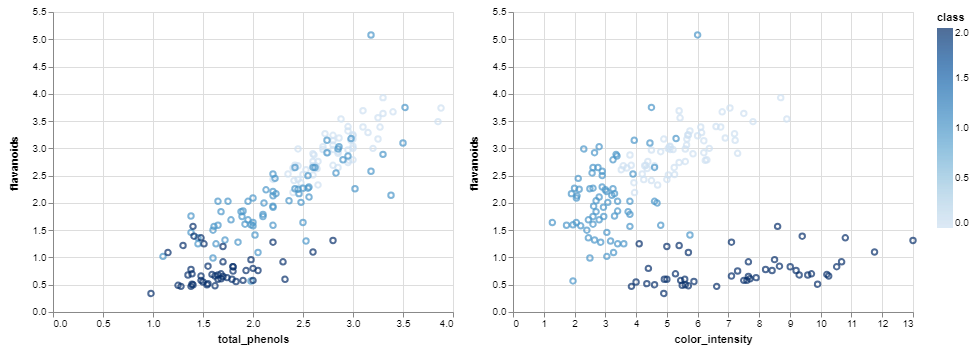

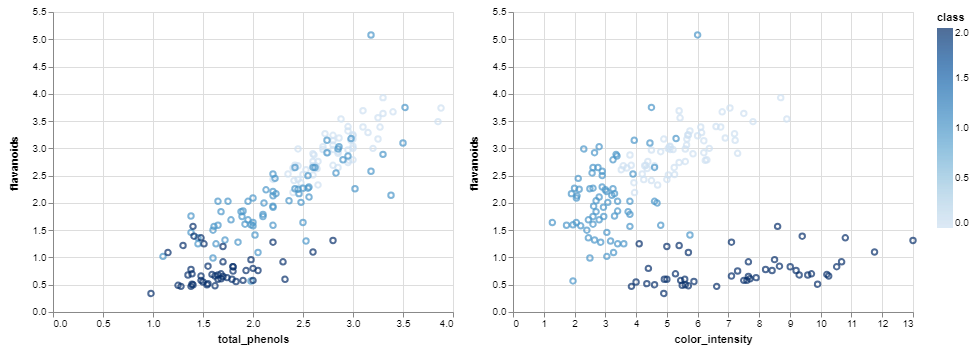

In [8]:
interval = alt.selection_interval()
base = alt.Chart(wineWithLabel).mark_point().encode(
    y = 'flavanoids',
    color = alt.condition(interval,'class', alt.value('lightgray')),
    tooltip="class"
).add_selection(interval)
base.encode(x='total_phenols')|base.encode(x="color_intensity")

We see that there are only 3 classes, and we can see that there are no missing values on the 'alcohol' feature.

In [9]:
assert len(wineWithLabel['class'].unique())==3

In [10]:
assert len(wineWithLabel.loc[(wineWithLabel['alcohol'].isnull())])==0

Continue with the analysis and create a classifier, then evaluate the performance of the classifier.

This are the programs used to run this notebook.

In [11]:
%load_ext watermark

In [12]:
%watermark -a 'FSU-Machine-Learning' -nmv --packages numpy,pandas,sklearn,matplotlib,altair

FSU-Machine-Learning Fri Feb 22 2019 

CPython 3.6.5
IPython 6.3.1

numpy 1.14.3
pandas 0.22.0
sklearn 0.19.1
matplotlib 2.2.2
altair 2.2.2

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 158 Stepping 9, GenuineIntel
CPU cores  : 8
interpreter: 64bit


<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>References</b> </font>


[1] http://www.cs.northwestern.edu/~pardo/courses/eecs349/index.php

[2] https://scikit-learn.org/stable/modules/tree.html

[3] https://en.wikipedia.org/wiki/Decision_tree

[4] https://en.wikipedia.org/wiki/Random_forest
